# Rapid Intensification Model, Chapter 1: Data Collection and Pre-Processing
- Creators: Naufal Razin<sup>1</sup>, Marie C. McGraw<sup>1</sup>, and Chris Slocum<sup>2</sup>
- Affiliation:
    - <sup>1</sup>Cooperative Institute for Research in the Atmosphere, Colorado State University, Fort Collins, CO
    - <sup>2</sup>NOAA/NESDIS Center for Satellite Applications and Research, Fort Collins, CO

---

## Overview
Tropical cyclone rapid intensification is a challenge for emergency preparedness given the rarity of the event and challenges in predicting it. To better predict tropical cyclone rapid intensification, forecasters rely on traditional and contemporary machine learning statistical models. These models use data from numerical weather prediction models and satellite observations to characterize the respective environmental state around the tropical cyclone and the tropical cyclone convective structure. In this notebook, you will learn to extract and pre-process environmental and satellite information of tropical cyclones along with the corresponding future 24-hour intensity change (the target variable) from the Tropical Cyclone Precipitation, Infrared, Microwave, and Environmental Dataset ([TC PRIMED](https://rammb-data.cira.colostate.edu/tcprimed/); Razin et al. 2023[a](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C01685/html),[b](https://journals.ametsoc.org/view/journals/bams/104/11/BAMS-D-21-0052.1.xml), [Slocum et al. 2022](https://journals.ametsoc.org/view/journals/clim/35/21/JCLI-D-22-0127.1.xml)). These extracted data will then be used to develop a machine learning statistical model to predict tropical cyclone rapid intensification in a subsequent notebook.

## Prerequisites
To successfully navigate and use this notebook, you should be familiar with:
- the basics of Python programming such as loading modules, assigning variables, and list/array indexing
- the Tropical Cyclone Precipitation, Infrared, Microwave, and Environmental Dataset (TC PRIMED) [data structure](https://github.com/noaa-ncai/learning-journey/tree/main/tcprimed)

## Learning Outcomes
By working through this notebook, you will learn how to:
- extract the relevant tropical cyclone environmental and convective information from TC PRIMED to train a machine learning statistical model to predict tropical cyclone rapid intensification.

## Time Estimate
- Estimated text reading time: 19 to 37 min
- Estimated code reading time: 17 to 34 min
- Estimated total reading time: 36 to 71 min

## Background
Historically, global and tropical-cyclone-specific numerical weather prediction models could not predict the extreme end of tropical cyclone intensification distribution, also known as "rapid intensification." Tropical cyclone rapid intensification is often defined as the 95<sup>th</sup>-percentile increase in the maximum 1-minute averaged tangential wind speed (intensity) over a 24-hour period, which corresponds to an intensity increase of 30 knots or stronger (1 knot = 0.514 m s<sup>-1</sup>) over 24 hours for tropical cyclones in the North Atlantic basin ([Kaplan and DeMaria 2003](https://journals.ametsoc.org/view/journals/wefo/18/6/1520-0434_2003_018_1093_lcorit_2_0_co_2.xml?tab_body=fulltext-display)). In the Western North Pacific basin, the 95<sup>th</sup>-percentile intensity increase over 24 hours correspond to a little over 30 knots or stronger. Hence, using the 30-knot threshold for all basins is common practice. Such a rapid change in intensity complicates hazards management and mitigation efforts like coordinating the evacuation of coastal communities in the path of a tropical cyclone (Figure 1).

Tropical cyclone evolution&mdash;from genesis, to intensification, to dissipation&mdash;depends on two main factors:

- synoptic-scale environmental conditions and
- internal, mesoscale dynamics

The environmental conditions determine the large-scale favorability for tropical cyclone development. For example, tropical cyclones obtain their energy from the ocean. The warmer the ocean temperatures, the more energy is available for tropical cyclone development. Similarly, tropical cyclones are able to sustain themselves or develop further in an environment with low magnitudes of vertical shear of the horizontal winds. The vertical shear of the horizontal wind characterizes the difference in wind speed and direction between the low and high atmospheric levels. High vertical shear magnitudes limit the vertical growth of the tropical cyclone, inhibiting its overall development.

Favorable environmental conditions subsequently affect the tropical cyclone internal dynamics. Tropical cyclone internal dynamics revolve around the organization and distribution of heat in the tropical cyclone, with the heat generated from latent heat release in deep convection. Deep convection and associated latent heat release close to the tropical cyclone center aids in tropical cyclone intensification.

Understanding the importance of both the tropical cyclone environment and internal dynamics, researchers developed a variety of traditional and contemporary machine learning statistical models to predict tropical cyclone rapid intensification ([DeMaria et al. 2021](https://www.mdpi.com/2073-4433/12/6/683), [Griffin et al. 2022](https://journals.ametsoc.org/view/journals/wefo/37/8/WAF-D-21-0194.1.xml), [Sampson et al. 2023](https://journals.ametsoc.org/view/journals/wefo/38/12/WAF-D-23-0084.1.xml)). These models use:

- outputs from numerical weather prediction models to characterize the tropical cyclone environment and
- satellite observations of deep convection as proxy for the tropical cyclone internal dynamics.

In this notebook, we will retrieve the relevant environmental information and satellite observations of tropical cyclones from the Tropical Cyclone Precipitation, Infrared, Microwave, and Environmental Dataset ([TC PRIMED](https://rammb-data.cira.colostate.edu/tcprimed/); Razin et al. 2023[a](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C01685/html),[b](https://journals.ametsoc.org/view/journals/bams/104/11/BAMS-D-21-0052.1.xml), [Slocum et al. 2022](https://journals.ametsoc.org/view/journals/clim/35/21/JCLI-D-22-0127.1.xml)). TC PRIMED contains pre-calculated environmental diagnostics (like sea surface temperature and vertical shear magnitude) and satellite infrared-based diagnostics, when available. We will also retrieve our target variable, the future 24-hour intensity change.

<figure>
<img alt="A two-panel figure showing GOES-16 10.3-micron longwave infrared observations of Hurricane Idalia (2023). In the first panel, Hurricane Idalia looked ragged on August 29, 2023 at 00 UTC, when it was a 60-knot storm (high-end tropical storm on the Saffir-Simpson Hurricane Wind Scale) at the onset of rapid intensification. In the second panel, Hurricane Idalia looked more organized 24 hours later after rapid intensification, when it was a 90-knot storm (Category 2 on the Saffir-Simpson Hurricane Wind Scale)." src="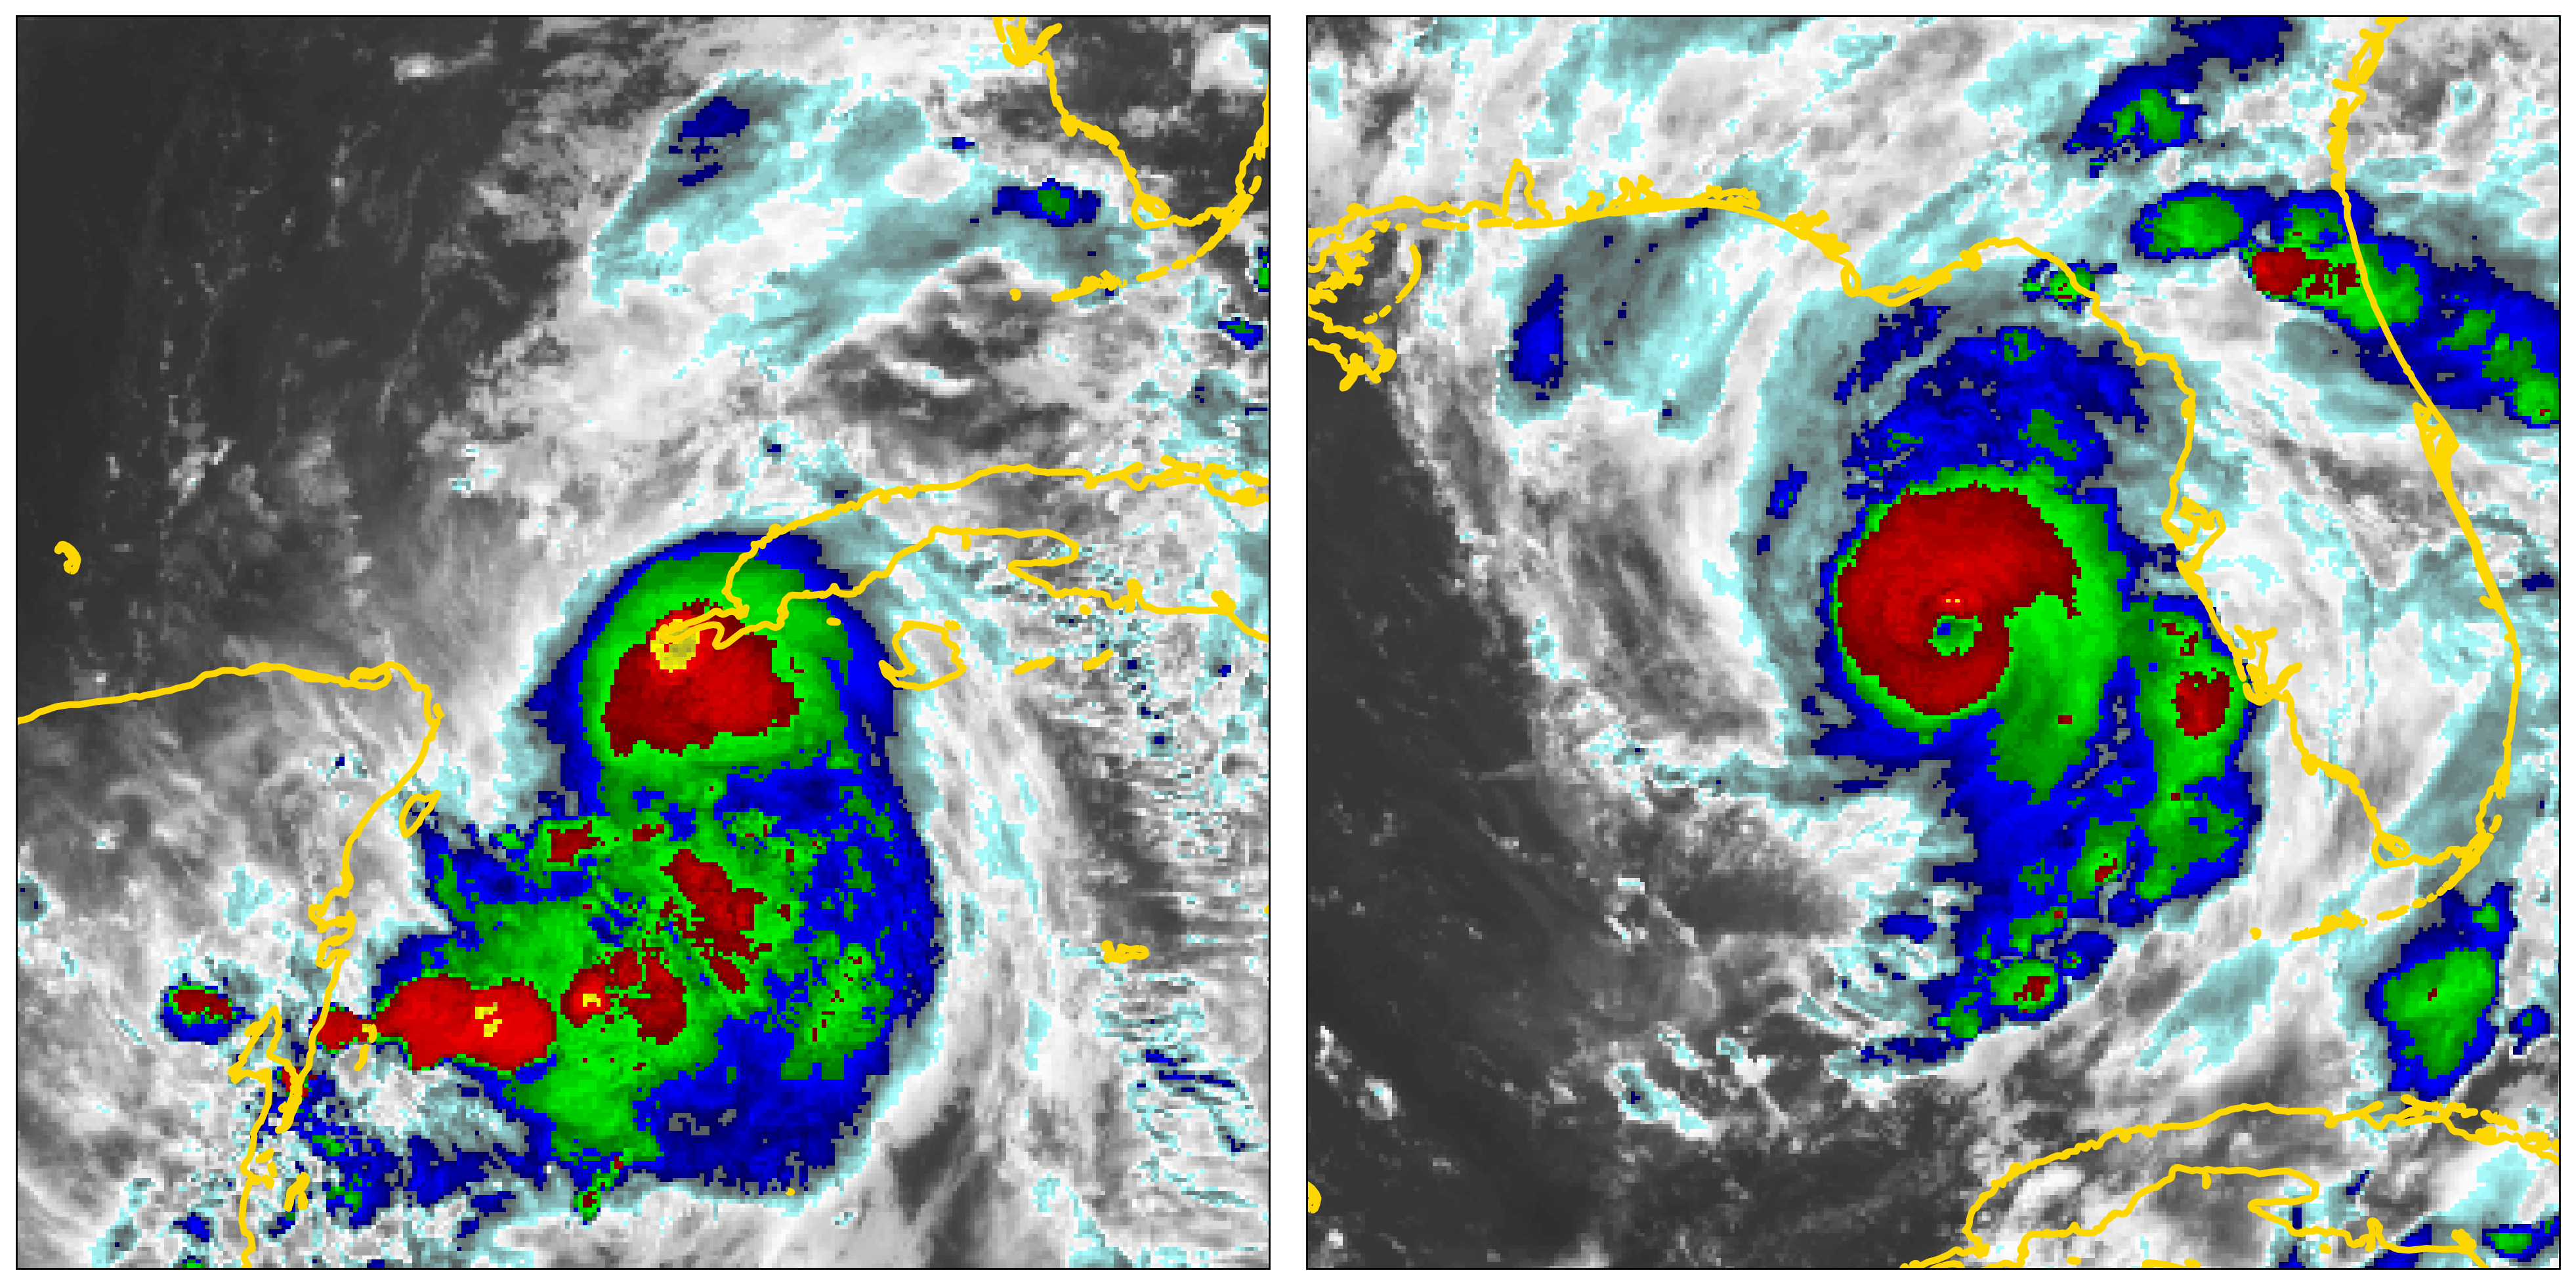" width="1200">

<figcaption align = "center"><b>Figure 1.</b> GOES-16 10.3-&mu;m longwave infrared observations of Hurricane Idalia (2023). Left panel: Hurricane Idalia on August 29, 2023 at 00 UTC, when it was a 60-knot storm (high-end tropical storm on the Saffir-Simpson Hurricane Wind Scale) at the onset of rapid intensification. Right panel, Hurricane Idalia 24 hours later after rapid intensification, when it was a 90-knot storm (Category 2 on the Saffir-Simpson Hurricane Wind Scale), and before it made landfall over Florida as a Category 3 hurricane on the Saffir-Simpson Hurricane Wind Scale.</figcaption>
</figure>

## Software
This tutorial uses the Python programming language and packages; We will use:
- [`tcprimedapi`](https://pypi.org/project/tcprimedapi/1.0a0/) to navigate the TC PRIMED Amazon Web Service (AWS) Simple Storage Service (S3) bucket
- `numpy` for array operations and simple numerical calculations
- `netCDF4` to read in the TC PRIMED file
- `pandas` to tabulate and export variables to a `.csv` file
- `requests` and `io` to retrieve a larger set of pre-pulled data from our Zenodo repository

### Install Packages
Let's first check if we have the necessary Python packages to run this notebook. If we don't, let's install them.

In [1]:
import subprocess, sys
packages = ["tcprimedapi", "numpy", "netCDF4", "pandas", "matplotlib"]
for package in packages:
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

Now, let's load the modules in the packages (e.g., `Dataset`) or load the packages and assign a shorter object name for the packages (e.g., `import pandas as pd`) for a cleaner use throughout the notebook.

In [2]:
# Load the Python packages we will use in this notebook
import tcprimedapi, re, requests, io
import numpy as np
from datetime import datetime, timedelta
from netCDF4 import Dataset
import pandas as pd
import matplotlib.pyplot as plt

## The TC PRIMED API

In this notebook, we will show an example of how to pull TC PRIMED data hosted on the Amazon Web Service (AWS) Simple Storage Service (S3) bucket. To navigate TC PRIMED data on the AWS S3 bucket, we will use the Python-based Application Programming Interface (API) developed by the TC PRIMED team, called the [`tcprimedapi`](https://pypi.org/project/tcprimedapi/1.0a0/). [`tcprimedapi`](https://pypi.org/project/tcprimedapi/1.0a0/) facilitates easier access to TC PRIMED data on the AWS S3 bucket by allowing users to query and retrieve data based on the a) tropical cyclone season, basin and/or number, b) TC PRIMED file type (i.e., particular satellite, sensor, or TC PRIMED environmental files), c) dates, and/or d) version type (final or preliminary). Users can look at examples of its application on the [`tcprimedapi` GitHub repository](https://github.com/CSU-CIRA/tcprimedapi/). However, for this notebook users would only need to understand the following:

- To query TC PRIMED data on the AWS S3 bucket, we first need to initialize a [Client](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/core/session.html#boto3.session.Session.client), which is a low-level interface that allows us to interact with AWS. We will initialize two clients: one for navigating TC PRIMED environmental files, and the other for navigating TC PRIMED overpass files.
- With the client, we will query TC PRIMED data using some of the search criteria we have identified above. The query will return a list of objects on the TC PRIMED AWS S3 bucket that match our search criteria.
- We can then choose to either read the contents of the objects directly&mdash;"in memory"&mdash;or download the objects as a file to a local directory. For the purposes of this notebook, we will read the contents of the objects directly, without having to download the TC PRIMED files.

Let's begin!

## Retrieving TC PRIMED Rapid Intensification Diagnostics


In this notebook, we will retrieve the TC PRIMED environmental and infrared-based diagnostics through a series of steps.
1. For each storm that we have selected, we will
    - retrieve the environmental diagnostics from the TC PRIMED environmental file.
    - query and retrieve the infrared-based diagnostics from the TC PRIMED overpass files. To retrieve the infrared data from the same storm as the environmental file, we will use some [regular expression](https://www.rexegg.com/).
    - merge the environmental and infrared-based diagnostics.
2. Finally, we will save the retrieved data into a `.csv` file.

Before we continue, there are a few things to note.
1. When developing a tropical cyclone rapid intensification statistical model, we will want to limit the model development and application to one basin, since there are non-negligible differences in the diagnostic values between the basins. For example, a threshold of vertical shear value below 10 m s<sup>-1</sup> may be sufficient to trigger tropical cyclone rapid intensification in the Atlantic basin, but that value may be lower in the Eastern North Pacific basin.
2. Retrieving the diagnostics data from the whole TC PRIMED period will take a long time. Instead, in this notebook, we will show an example of how to pull the data from one storm. When investigating the relationships between the diagnostics and intensity change, and when training the model in the following notebook, we will use the pre-pulled data from our [Zenodo repository](https://doi.org/10.5281/zenodo.16583938).

### Retrieving TC PRIMED Environmental Diagnostics
Let's now define a function to retrieve the diagnostic and target variables from the TC PRIMED environmental files. We will loop through each available synoptic time in the TC PRIMED environmental file and pull the target variable (future 24-hour intensity change) and diagnostic variables relative to that specific synoptic time, which we will denote as the observation time. For example, let's say we're retrieving the diagnostic variables at 12 UTC on August 20th&mdash;the observation time. The future 24-hour intensity change will be the intensity change from 12 UTC on August 20th to the 12 UTC on August 21st, with 12 UTC on August 21st being our forecast time. Similarly, all diagnostic variables we will pull will be within a period relative to the observation time.

The diagnostic variables we're pulling here are based on the variables used to develop existing rapid intensification statistical models ([Kaplan et al. 2015](https://journals.ametsoc.org/view/journals/wefo/30/5/waf-d-15-0032_1.xml), [Knaff et al. 2018](https://journals.ametsoc.org/view/journals/wefo/33/3/waf-d-18-0012_1.xml)), and include:
- storm information at observation time such as storm intensity, previous 12-hour intensity change, and storm latitude
- environmental diagnostics averaged over the forecast period&mdash;24 hours into the future. In real-time applications, these variables are calculated from the numerical weather prediction model forecast fields. For TC PRIMED, these variables are calculated from the reanalysis fields.

In characterizing the tropical cyclone synoptic-scale environment, there are a few "flavors" that exist:
- Variables that are calculated over different radial regions. For example, vertical shear may be calculated and averaged over an annulus region from 0 to 300 km, 0 to 500 km, 0 to 800 km, or 200 to 800 km from the storm center (Figure 2).

    AND/OR


- Variables that are calculated for different vertical layers. For example, vertical shear may be calculated for a shallow layer from 850 to 500 hPa or a deeper layer from 850 to 200 hPa.

    AND/OR


- Variables that exist on multiple vertical levels. For example, the relative humidity variable exists at the 1000 hPa level and all the way up to 50 hPa at 50 hPa intervals.

In retrieving these different environmental diagnostic variables, we will want to specify the radial region, vertical layer, and/or vertical levels. In addition, we want to specify the variables that we want at only the observation time so that we can skip averaging those variables over the forecast period when we retrieve them. Let's specify them now.

<figure>
    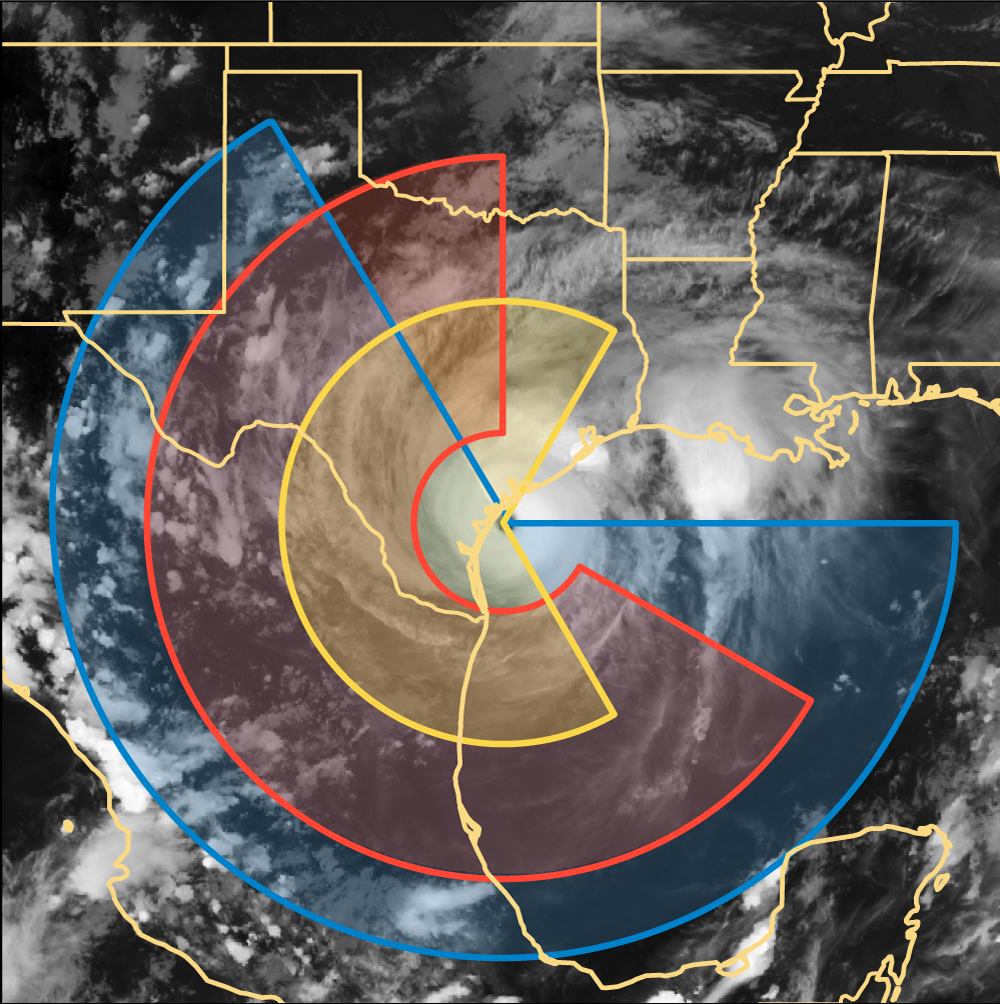
    <figcaption align = "center"><b>Figure 2.</b> GOES-16 preliminary, nonoperational 10.3-μm longwave infrared observation at 0000 UTC 26 Aug 2017 showing Hurricane Harvey prior to landfall with the area-averaging regions from 0 to 1000 km (blue circle), 200 to 800 km (red annulus), and 0 to 500 km (yellow circle). Note that portions of each circle and annulus are removed to assist with clarity. Figure taken from <a href="https://journals.ametsoc.org/view/journals/clim/35/21/JCLI-D-22-0127.1.xml">Slocum et al. (2022)</a>. Published 2022 by the American Meteorological Society.</figcaption>
    
</figure>

In [3]:
# List of regions used in calculating the multi-region diagnostic variables
regions = np.array(["0_to_300_km", "0_to_500_km", "0_to_800_km", "200_to_800_km"])

# List of layers used in calculating the multi-layer diagnostic variables
layers = np.array(["850_to_500_hPa", "850_to_200_hPa"])

# From the list above, specify the regions for the kinematic variables
# (i.e., vertical shear) that we want to obtain
kinematic_regions = np.array(["0_to_500_km"])

# From the list above, specify the layers for the kinematic variables
# (i.e., vertical shear) that we want to obtain
kinematic_layers = np.array(["850_to_500_hPa", "850_to_200_hPa"])

# From the list above, specify the regions for the thermodynamic variables
# (i.e., relative humidity) that we want to obtain
thermodynamic_regions = np.array(["200_to_800_km"])

# Specify the averaging levels for the thermodynamic variables
# (i.e., relative humidity) that we want to obtain
thermodynamic_levels = ((700, 850),
                        (500, 700),
                        (300, 500))

# For vorticity and divergence, specify the pressure level we want to obtain
vorticity_level = 850
divergence_level = 200

# Specify variables we want to retrieve at only the observation time so that
# we can calculate the future 24-hour averaged values for the other variables
single_time_vars = np.array(["storm_lat", "storm_v", "storm_u", "vmax", "dvmax", "pot"])

One last thing to note about retrieving diagnostics to predict tropical cyclone rapid intensification is that the tropical cyclone must not be influenced by land. Since tropical cyclones get their energy from the ocean, land surfaces cut off that energy source. Therefore, tropical cyclones tend to weaken when they are close to or are over land. When predicting tropical cyclone rapid intensification, we want the observed intensity change to be mainly the result from the tropical cyclone's environment and internal dynamics. Therefore, when retrieving the diagnostics, we must ensure that the tropical cyclone remained some distance away from the nearest land surface within a period spanning:
- 12 hours before the observation time (to account for the previous 12-hour intensity change)
- through the forecast period (24 hours into the future)

Here, we have chosen that distance to be 200 km. In TC PRIMED, the distance to land is largely determined by two variables:
- Distance to land calculated from observations
- The sea surface temperature variable. The sea surface temperature is variable is averaged within 50 km of the reanalysis tropical cyclone center. There is a slight difference between the location of the observed tropical cyclone and the location of the tropical cyclone in the reanalysis fields (see Slocum et al. 2022). If the reanalysis tropical cyclone center is over land, the sea surface temperature will have a `_FillValue` and be masked

So, as you will notice in the function below, we will check that the observed tropical cyclone center is beyond 200 km from land, and that the sea surface temperature values are not masked for the 36-hour period spanning from 12 hours before the observation time through the forecast period (24 hours into the future).

In [4]:
def retrieve_tcprimed_environmental_diagnostics(env_object_key, env_memory):
    """
    Retrieve environmental diagnostics from the environmental
    file for a storm in TC PRIMED
    
    Parameters
    ----------
    env_object_key : str
        The path to the TC PRIMED environmental file on NODD
        obtained from tcprimedapi query
    env_memory : bytes
        The block of memory the TC PRIMED environmental file
        on NODD obtained from tcprimedapi query
        
    Returns
    -------
    env_dict : dict
        Dictionary with all the environmental diagnostic variables
        for a storm in TC PRIMED
    atcf_id: str
        The Automated Tropical Cyclone Forecast (ATCF) system
        identifier for the corresponding TC PRIMED environmental
        file to use in retrieving the infrared-based diagnostics
    """

    # Specify the regular expression to apply to the object key
    # so that we can retrieve the storm ATCF ID to use in retrieving
    # the infrared-based diagnostics
    S3_regex = r"(?P<version>\w{6})/(?P<version_type>\w{5,11})/(?P<season>\d{4})/(?P<basin>\w{2})/(?P<cyclone_number>\d{2})"

    # Get the matching regular expression from the object_key
    regex_match = re.match(S3_regex, env_object_key)

    # Generate ATCF ID from regex_match
    atcf_id = regex_match["basin"] + regex_match["cyclone_number"] + regex_match["season"]
    
    # Initialize dictionary to obtain diagnostic variables at all synoptic times throughout the storm's life
    all_times_dict = dict()
    
    # Load file and obtain variables at all synoptic times throughout the storm's life
    with Dataset(env_object_key, memory=env_memory) as DS:
        
        # Retrieve datetimes for storm and environmental diagnostics
        all_times_dict["datetimes"] = np.array([datetime.fromtimestamp(t) for t in DS["storm_metadata/time"][:]])
        
        # Retrieve storm ATCF ID and season
        all_times_dict["season"] = regex_match["season"]
        all_times_dict["atcfid"] = atcf_id
        
        # Retrieve storm information variables (i.e., storm motion and intensity)
        all_times_dict["dtl"] = DS["storm_metadata/distance_to_land"][:]
        all_times_dict["storm_lat"] = DS["storm_metadata/storm_latitude"][:]
        all_times_dict["storm_v"] = DS["storm_metadata/storm_speed_meridional_component"][:]
        all_times_dict["storm_u"] = DS["storm_metadata/storm_speed_zonal_component"][:]
        all_times_dict["vmax"] = DS["storm_metadata/intensity"][:]
        all_times_dict["dvmax"] = DS["storm_metadata/intensity_change"][:]
        all_times_dict["fcst_time"] = np.array([datetime.fromtimestamp(t)\
                                                for t in DS["storm_metadata/intensity_change_times"][:, -1]])
        
        # Retrieve environmental diagnostics calculated for only a single region
        # For sea surface temperature, convert the value from Kelvin to degrees Celsius
        all_times_dict["sst"] = DS["diagnostics/sst"][:, 0] - 273.15
        
        # We're not using the maximum potential intensity (MPI) directly. Rather we will use that
        # to calculate the potential intensification (MPI minus intensity)
        mpi = DS["diagnostics/potential_intensity_empirical"][:, 0]
        all_times_dict["pot"] = mpi - all_times_dict["vmax"]
        
        # Retrieve kinematic diagnostics variable calculated over the kinematic regions
        for kinematic_region in kinematic_regions:
            
            reg_idx = np.argwhere(regions == kinematic_region)[0]
            
            all_times_dict["tadv_" + kinematic_region] = DS["diagnostics/temperature_advection"][:, reg_idx]
            
            all_times_dict["shrg_" + kinematic_region] = DS["diagnostics/shear_generalized"][:, reg_idx]
            
            # Retrieve kinematic diagnostics variable calculated over the kinematic regions and
            # kinematic layers
            for kinematic_layer in kinematic_layers:
                
                var_key = f"shrd_{kinematic_region}_{kinematic_layer}"
                lyr_idx = np.argwhere(layers == kinematic_layer)[0]

                all_times_dict[var_key] = DS["diagnostics/shear_magnitude"][:, lyr_idx, reg_idx]
        
        # Load the diagnostics level variable to help in averaging diagnostic variables
        # across multiple levels
        levels = DS["diagnostics/level"][:]
        
        # Retrieve the thermodynamic variables calculated over the thermodynamic regions and
        # thermodynamic levels
        for thermodynamic_region in thermodynamic_regions:
            
            for level_tuple in thermodynamic_levels:
                
                idx_top = np.argwhere(levels == level_tuple[0])[0][0]
                idx_bot = np.argwhere(levels == level_tuple[1])[0][0] + 1
                
                var_key = f"rh_{thermodynamic_region}_{level_tuple[0]:d}_{level_tuple[1]:d}_hPa"
                reg_idx = np.argwhere(regions == thermodynamic_region)[0]
                
                all_times_dict[var_key] = DS["diagnostics/relative_humidity"][:, idx_top:idx_bot, reg_idx].mean(axis=1)
                
        # Retrieve variables at specific levels
        vorticity_idx = np.argwhere(levels == vorticity_level)[0]
        all_times_dict[f"z_{vorticity_level:d}"] = DS["diagnostics/vorticity"][:, vorticity_idx, 0]
        
        divergence_idx = np.argwhere(levels == divergence_level)[0]
        all_times_dict[f"d_{divergence_level:d}"] = DS["diagnostics/divergence"][:, divergence_idx, 0]
    
    # Initialize dictionary to obtain diagnostic variables when the storm is not influenced by land
    env_dict = dict()
    
    # Initialize availability of environmental predictors with a flag with a value of zero 
    env_dict["flag"] = 0
    
    # Initialize array to store the datetimes for the environmental predictors
    env_dict["datetimes"] = np.array([])
    
    # If the storm's life is short, we won't have enough time steps to obtain the various storm
    # and environmental diagnostics. We'll skip these cases.
    # If the storm lived long enough, proceed to obtain the various storm and environmental diagnostics.
    if all_times_dict["datetimes"].size > 6:
        
        # Loop through all storm and environmental diagnostic times.
        # We start with the third element of time (idx of 2) so that we can
        # obtain the intensity change over the past 12 hours
        # We end with the fourth from last element of time (idx of -4) so that we can
        # obtain the intensity change over the following 24 hours
        for t_idx in range(2, all_times_dict["datetimes"].size - 4):
        
            # First, check if the storm is sufficiently far enough from land in a 36-hour window,
            # 12 hours prior to current synoptic time to 24 hours after current synoptic time
            t36_window_idx = slice(t_idx - 2, t_idx + 5)
            
            # If, at the synoptic time, the storm is within 200 km from land
            # and the sea surface temperature values are masked, skip retrieving
            # the diagnostics. Or else, proceed to retrieving the diagnostics
            if np.ma.is_masked(all_times_dict["sst"][t36_window_idx]) or\
                all_times_dict["dtl"][t36_window_idx].min() < 200:
                continue
                
            # Append the observation time to our dictionary
            t_key = all_times_dict["datetimes"][t_idx]
            env_dict["datetimes"] = np.append(env_dict["datetimes"], t_key)
                
            # Generate a dictionary to store the environmental diagnostics using the
            # diagnostic time as the dictionary key
            env_dict[t_key] = dict()
        
            # Convert the datetime object into string to save in the .csv file
            env_dict[t_key]["datetime_str"] = t_key.strftime("%Y-%m-%dT%H:%M:%S")
                
            # Loop through all variables we have selected above
            for var_key in all_times_dict:
                    
                # If the variable is a variable we only want at a single time
                if (var_key in single_time_vars) == True:
                        
                    # If the variable is the intensity change
                    if var_key == "dvmax":
                            
                        # Obtain the intensity change over the past 12 hours
                        env_dict[t_key]["per"] = all_times_dict["dvmax"][t_idx, 2]
                            
                        # Obtain the intenity change over the next 24 hours, our target label
                        env_dict[t_key]["dvmax24"] = all_times_dict["dvmax"][t_idx, -1]
                        
                    # If variable is not intensity change, simply obtain them at the current
                    # diagnostic time
                    else:
                            
                        env_dict[t_key][var_key] = all_times_dict[var_key][t_idx]
            
                # If the variable is the storm season or ATCF ID, store the variables
                # These variables make it easier for us to diagnose different storms
                # at different times during model development
                elif var_key == "season" or var_key == "atcfid":
                        
                    env_dict[t_key][var_key] = all_times_dict[var_key]
            
                # Obtain the forecast time and convert it to string to save in the .csv file
                elif var_key == "fcst_time":
                        
                    env_dict[t_key]["fcst_time_str"] = all_times_dict[var_key][t_idx].strftime("%Y-%m-%dT%H:%M:%S")
                            
                # If the variable is a variable we want to calculate over the following 24 hours
                # is not the datetimes, distance to land, or any of the above variables
                # proceed to average them
                elif var_key != "datetimes" and var_key != "dtl":
                        
                    # Get the index for the following 24 hours
                    t24_future_idx = slice(t_idx, t_idx + 5)
                        
                    # Calculate the mean of the variables for the following 24 hours
                    env_dict[t_key][var_key] = np.mean(all_times_dict[var_key][t24_future_idx])
    
    # If environmental predictors are available, we would have their corresponding
    # datetimes stored in the dictionary. If they are available, change the
    # availability flag for the environmental predictors
    if env_dict["datetimes"].size > 0:
        
        env_dict["flag"] = 1
        
    return env_dict, atcf_id

### Retrieving TC PRIMED Infrared-Based Diagnostics

Now that we have defined a function to retrieve the environmental diagnostics, let's define a function to retrieve the satellite infrared-based diagnostics from the TC PRIMED files. As we have discussed above, the satellite infrared-based diagnostics serve as a proxy for the tropical cyclone internal dynamics. For example, the presence of deep convection would result in low infrared brightness temperatures, as observed from a satellite. Where the convection is the strongest (whether in the tropical cyclone inner core or the outer core) and how widespread it is (whether located on one side of the storm or encircling the center of the storm) determine its efficiency in influencing the tropical cyclone evolution. There are a variety of ways in which existing statistical rapid intensification models characterize this convective activity, like the fractional number of pixels, within a radial region, that is below a certain brightness temperature value (i.e., &minus;30&deg;C). TC PRIMED already pre-calculates these variables, and we will simply retrieve these variables from the TC PRIMED files.

Since TC PRIMED is a dataset centered around satellite passive microwave observations of tropical cyclones, the infrared data is stored in the TC PRIMED overpass files. Consequently, multiple overpass files may have infrared observation and corresponding diagnostics from the same time. For example, an overpass at 1150 UTC and 1215 UTC may have the same infrared observation and diagnostics from 1200 UTC. Therefore, when storing the infrared-based diagnostics, we will use the satellite infrared observation time to store the data and keep track of which data has already been stored.

Let's specify the infrared diagnostic variables we will want to retrieve from the TC PRIMED files and assign them a shorter variable name for easier use throughout this Learning Journey.

In [5]:
# Specify our own _FillValue to be consistent with the rest of our code
_FillValue = -999.0

# Specify partial label we will use in labeling the percent pixel
# below threshold variable
pixel_count_labels = np.arange(60, 9, -10).astype(str)

# Specify the variable name as it appears in the TC PRIMED overpass file
# and a shortened version for us to use, for the variables calculated over
# multiple radial regions
multi_region_variables = (("brightness_temperature_annulus_mean", "ir_mean"),
                          ("brightness_temperature_annulus_standard_deviation", "ir_std_dev"))

# Specify the two regions used for the variables calculated over
# multiple radial regions
region_labels = np.array(["0_200_km", "100_300_km"])

# Specify the variable name as it appears in the TC PRIMED overpass file
# and a shortened version for us to use, for the variables calculated over
# a single radial region
single_region_variables = (("brightness_temperature_eye_maximum", "ir_eye_max"),
                           ("brightness_temperature_eye_mean", "ir_eye_mean"),
                           ("brightness_temperature_radial_profile_eye_maximum_radius", "ir_eye_max_radius"),
                           ("brightness_temperature_radial_profile_annulus_minimum", "ir_profile_min"),
                           ("brightness_temperature_radial_profile_annulus_mean", "ir_profile_mean"),
                           ("brightness_temperature_radial_profile_annulus_minimum_radius", "ir_profile_min_radius"))

Infrared data are not always available in a TC PRIMED overpass file. And, on the rare occasion, infrared data for the whole storm may not be available at all. Nonetheless, we will collect whatever infrared data is available from all overpass files for the storm, and we will deal with merging the infrared data with the environmental data later.

In [6]:
def retrieve_tcprimed_infrared_diagnostics(atcf_id):
    """
    Retrieve infrared-based diagnostics from all overpass files
    for a storm in TC PRIMED
    
    Parameters
    ----------
    atcf_id : str
        The Automated Tropical Cyclone Forecasting system
        identifier for the storm
            
    Returns
    -------
    ir_dict : dict
        Dictionary containing infrared-based diagnostics from
        all overpass files for a storm in TC PRIMED
    """
    
    # Initialize dictionary to store variables
    ir_dict = dict()
    
    # Generate and store all the variable names we will use from above
    # for easier processing later
    ir_dict["vars"] = np.array([])
    
    for pixel_count_label in pixel_count_labels:
        
        var_key = f"PC{pixel_count_label}"
        
        ir_dict["vars"] = np.append(ir_dict["vars"], var_key)
    
    for var_tuple in multi_region_variables:
        
        for region_label in region_labels:
            
            var_key = f"{var_tuple[1]}_{region_label}"
            
            ir_dict["vars"] = np.append(ir_dict["vars"], var_key)
            
    for var_tuple in single_region_variables:
        
        ir_dict["vars"] = np.append(ir_dict["vars"], var_tuple[1])
    
    # Initialize availability of infrared-based predictor with a flag with a value of zero
    ir_dict["flag"] = 0
    
    # Initialize array to store the datetimes for all infrared-based predictors
    ir_dict["datetimes"] = np.array([])

    # Initialize a Client to query all the TC PRIMED overpass files for the storm
    tcpc_ovp = tcprimedapi.Client()
    
    # List sensors for all TC PRIMED overpass files, since we want the overpass
    # files and not the environmental file
    tcprimed_sensors = ["AMSR2", "AMSRE", "AMSUB", "ATMS", "GMI", "MHS", "SSMI", "SSMIS", "TMI"]

    # Query the TC PRIMED AWS S3 bucket for files that match our storm
    # and overpass file criteria
    tcpc_ovp.query({'atcf_id': [atcf_id],
                    'file_type': tcprimed_sensors})

    # Loop through each overpass file that match our criteria
    for ovp_object_key, ovp_memory in tcpc_ovp.inmemory():
        
        # Load the contents of the overpass file
        with Dataset(ovp_object_key, memory=ovp_memory) as DS:
                
            # Check if infrared data is available in the overpass file
            ir_flag = DS["infrared/infrared_availability_flag"][:][0]
                
            # If infrared data is not available skip the file
            # If it is, proceed to retrieve the variables
            if ir_flag == 0:
                continue
                    
            # Retrieve time of infrared observation
            ir_datetime = datetime.fromtimestamp(DS["infrared/time"][:][0])
                    
            # Check to see if we have pulled the infrared data from the observation time
            # If we have, skip the file. If we haven't, continue to retrieve the
            # variables
            if ir_datetime in ir_dict["datetimes"]:
                continue
                        
            # Append the infrared observation time to our dictionary
            ir_dict["datetimes"] = np.append(ir_dict["datetimes"], ir_datetime)
                        
            # Generate a dictionary to store the infrared-based diagnostics using the
            # infrared observation time as the dictionary key
            ir_dict[ir_datetime] = dict()
                       
            # Retrieve the percent pixel below threshold variables
            ir_pc = DS["infrared/percent_pixel_below_threshold"][:, 0]
                    
            # Loop through each element in the variable array
            for idx, val in np.ndenumerate(pixel_count_labels):
                        
                # If element is masked, assign it with our pre-determined _FillValue
                if np.ma.is_masked(ir_pc[idx]):
                                
                    ir_dict[ir_datetime]["PC" + val] = _FillValue
                            
                # If element is not masked, retrieve it and store it in our dictionary
                else:
                                
                    ir_dict[ir_datetime]["PC" + val] = ir_pc[idx]
                        
            # Loop through the tuple we've created for the multi-region variables
            for var_tuple in multi_region_variables:
                            
                # Retrieve the multi-region variable using the TC PRIMED variable name
                # element in our tuple
                var = DS["infrared/" + var_tuple[0]][:]
                            
                # Loop through each region
                for idx, region in np.ndenumerate(region_labels):
                                
                    # If variable in region is masked, assign it with our pre-determined
                    # _FillValue
                    if np.ma.is_masked(var[idx]):
                                    
                        ir_dict[ir_datetime][var_tuple[1] + "_" + region] = _FillValue
                                
                    # If variable in region is not masked, retrieve it and store it in our
                    # dictionary
                    else:
                                    
                        ir_dict[ir_datetime][var_tuple[1] + "_" + region] = var[idx]
                        
            # Loop through the tuple we've created for the single-region variables
            for var_tuple in single_region_variables:
                            
                # Retrieve the single-region variable using the TC PRIMED variable name
                # element in our tuple
                var = DS["infrared/" + var_tuple[0]][:]
                            
                # If variable is masked, assign it with our pre-determined _FillValue
                if np.ma.is_masked(var):
                                
                    ir_dict[ir_datetime][var_tuple[1]] = _FillValue
                            
                # If variable is not masked, retrieve it and store it in our dictionary
                else:
                                
                    ir_dict[ir_datetime][var_tuple[1]] = var[0]
    
    # If infrared-based predictors are available, we would have their corresponding
    # datetimes stored in the dictionary. If they are available, change the
    # availability flag for the infrared-based predictors
    if ir_dict["datetimes"].size > 0:
        
        ir_dict["flag"] = 1
        
    return ir_dict

## Merging TC PRIMED Environmental and Infrared-Based Diagnostics

When merging the infrared-based diagnostics with the environmental diagnostics, we must ensure that the infrared observation occurred as close as possible to the environmental diagnostics. In this notebook, we set a condition that the infrared observation must be within 2 hours of the environmental data observation.

However, as we have discussed above, infrared observation and corresponding diagnostics are stored in the TC PRIMED overpass files, and that:
- they may not be available at all for a particular storm
- they may be available for only some overpasses
- even if they are available for all overpasses, earlier in the TC PRIMED period, only a handful of sensors were in orbit. Hence, there may not be any infrared observation close to the environmental data observation time. 

Restricting our data merge to cases where *both* the environmental and infrared diagnostic exist would reduce our sample size. Instead, we will keep all available environmental diagnostic data and assign a \_FillValue for when infrared data is not available, either for the storm, or close to the observation time. Storing the diagnostic data this way allows us some flexibility&mdash;we can focus the rapid intensification statistical model development on only the environmental data, or on both the environmental and infrared data by subsetting our dataset by infrared data that are not \_FillValue.

Let's define this data merge function.

In [7]:
def merge_tcprimed_diagnostics(env_dict, ir_dict):
    """
    Merge infrared-based diagnostic information into the environmental
    diagnostic information for a storm
    
    Parameters
    ----------
    env_dict : dict
        Dictionary with all the environmental diagnostic variables for
        a storm in TC PRIMED
        
    ir_dict : dict
        Dictionary containing infrared-based diagnostics from all
        overpass files for a storm in TC PRIMED
        
    Returns
    -------
    env_dict : dict
        Dictionary with all the environmental and infrared-based
        diagnostic variables for a storm in TC PRIMED
    """
    
    # If infrared data is not available for the storm at all
    if ir_dict["flag"] == 0:
        
        # Loop through all environmental data observation
        for env_datetime in env_dict["datetimes"]:
            
            # Loop through all infrared-based diagnostic variable name
            for ir_var_key in ir_dict["vars"]:
                
                # Store variable as _FillValue
                env_dict[env_datetime][ir_var_key] = _FillValue
    
    # If infrared data is available for the storm
    else:
        
        # Loop through all environmental data observation
        for env_datetime in env_dict["datetimes"]:
            
            # Find the minimum absolute time difference between the infrared observations
            # and the environmental data observation
            env_ir_time_diff = np.absolute(env_datetime - ir_dict["datetimes"])
            env_ir_time_diff_min = np.min(env_ir_time_diff)
            
            # If the minimum absolute time difference is less than 2 hours
            if env_ir_time_diff_min <= timedelta(hours=2):
                
                # Get the infrared diagnostic time, use that time as our dictionary key
                # to retrieve the infrared variable from the infrared dictionary
                ir_datetime_idx = np.argwhere(env_ir_time_diff == env_ir_time_diff_min)[0][0]
                ir_datetime = ir_dict["datetimes"][ir_datetime_idx]
                
                for ir_var_key in ir_dict["vars"]:
                    
                    env_dict[env_datetime][ir_var_key] = ir_dict[ir_datetime][ir_var_key]
            
            # If the minimum absolute time difference is more than 2 hours, there are
            # no infrared observation close to the environmental observation
            else:
                
                # Loop through all infrared-based diagnostic variable name
                for ir_var_key in ir_dict["vars"]:
                    
                    # Store variable as _FillValue
                    env_dict[env_datetime][ir_var_key] = _FillValue
                    
    return env_dict

## Generate TC PRIMED Diagnostics
Now that we have defined the various functions above, let's combine them together into a function that pulls the TC PRIMED diagnostic data and saves it into a file. As we mentioned above, we will retrieve the environmental and infrared-based diagnostics for only one storm in this notebook. But, we will add some flexibility in our function's keyword argument to retrieve the diagnostic variables for a specific storm or for a whole range of storms.

In [8]:
def generate_tcprimed_diagnostics(season_list, basin_list, cyclone_number_list=None):
    """
    Retrieve and generate a list of tropical cyclone rapid
    intensification predictors from TC PRIMED
    
    Parameters
    ----------
    season_list : array-like
        A list of strings for the tropical cyclone season
        from which to retrieve the environmental and
        infrared-based rapid intensification diagnostics
        from TC PRIMED
        
    basin_list : array-like
        A list of strings for the tropical cyclone basin
        from which to retrieve the environmental and
        infrared-based rapid intensification diagnostics
        from TC PRIMED

    cyclone_number_list : array-like
        A list of strings for the tropical cyclone number
        from which to retrieve the environmental and
        infrared-based rapid intensification diagnostics
        from TC PRIMED
    """

    # Initialize a pandas DataFrame to stor our diagnostic variables
    df = pd.DataFrame()

    # Initialize a Client to query all TC PRIMED environmental files
    # that match our criteria
    tcpc_env = tcprimedapi.Client()

    # If we're pulling the diagnostics from specific storms,
    # use the initialized client with a more refined search
    # criteria
    if cyclone_number_list is not None:

        tcpc_env.query({"season": season_list,
                        "basin": basin_list,
                        "cyclone_number": cyclone_number_list,
                        "file_type": ["env"]})
    
    # If we're pulling the diagnostics for a broader range of
    # seasons and/or basins, use a more generic search criteria
    else:

        tcpc_env.query({"season": season_list,
                        "basin": basin_list,
                        "file_type": ["env"]})
    
    # Loop through each environmental file that match our criteria
    for env_object_key, env_memory in tcpc_env.inmemory():
        
        # Retrieve environmental diagnostics from the environmental file for the storm
        env_dict, atcf_id = retrieve_tcprimed_environmental_diagnostics(env_object_key, env_memory)
        
        # Continue only if environmental diagnostics variables are available
        if env_dict["flag"] == 1:
            
            # Retrieve all available infrared-based diagnostic
            # for that storm
            ir_dict = retrieve_tcprimed_infrared_diagnostics(atcf_id)
            
            # Merge the infrared and environmental diagnostics
            env_dict = merge_tcprimed_diagnostics(env_dict, ir_dict)
            
            # For each observation time, append the diagnostic variables
            # into a pandas DataFrame
            for env_datetime in env_dict["datetimes"]:
                
                row_df = pd.DataFrame.from_records([env_dict[env_datetime]])
                df = pd.concat([df, row_df], ignore_index=True)
    
    # Save the diagnostic variables into a .csv file
    if cyclone_number_list is not None:
        
        csv_filename = "tcprimed_diagnostics_" + season_list[0] + "_" + season_list[-1] +\
                       "_" + "".join(basin_list) + "_" + "".join(cyclone_number_list) + ".csv"

    else:

        csv_filename = "tcprimed_diagnostics_" + season_list[0] + "_" + season_list[-1] +\
                       "_" + "".join(basin_list) + ".csv"
    
    df.to_csv(csv_filename, index=False)

Let's generate a sample file containing the TC PRIMED environmental and infrared-based diagnostics. Recall our discussion earlier that we would want to retrieve all diagnostics for a particular basin. That would still take some time to run. Instead, our function above is flexible enough that we can pull all available diagnostics for a particular storm. In this example, we will pull all available TC PRIMED diagnostic from Hurricane Florence (2018): `season=2018`, `basin=AL`, and `cyclone_number=06`.

In [9]:
generate_tcprimed_diagnostics(["2018"],["AL"],["06"])

Querying the following request:
 {'season': ['2018'], 'basin': ['AL'], 'cyclone_number': ['06'], 'file_type': ['env']}
Total files matching request: 1
Querying the following request:
 {'atcf_id': ['AL062018'], 'file_type': ['AMSR2', 'AMSRE', 'AMSUB', 'ATMS', 'GMI', 'MHS', 'SSMI', 'SSMIS', 'TMI']}
Total files matching request: 341


## Data Exploration
Now that we have learned to extract diagnostic and intensity change information from TC PRIMED, let's explore the diagnostic data and their relationship to intensity change. Understanding this relationship helps inform our physical understanding of the diagnostic variables and will guide us in setting up our rapid intensification model for success.

In the example above, we looked at retrieving the diagnostics and intensity change information from one storm. In this section, we will use the pre-pulled diagnostic and intensity change information from the whole TC PRIMED period. Let's read this data from [our Zenodo repository](https://doi.org/10.5281/zenodo.16583938).

In [10]:
# Specify URL to file on Zenodo
file_url = "https://zenodo.org/records/16583938/files/tcprimed_diagnostics_1987_2023_AL.csv"

# Download file content into memory
request = requests.get(file_url)
file_content = request.content

# Create an in-memory binary stream
buffer = io.BytesIO(file_content)

# Read the contents of the file
df = pd.read_csv(buffer)

Let's remind ourselves of the variables we have pulled above.

In [11]:
# Retrieve the names for all variables
all_vars = np.array(df.columns)

# Print out all variable names
for varname in all_vars:
    
    print(varname)

datetime_str
season
atcfid
storm_lat
storm_v
storm_u
vmax
per
dvmax24
fcst_time_str
sst
pot
tadv_0_to_500_km
shrg_0_to_500_km
shrd_0_to_500_km_850_to_500_hPa
shrd_0_to_500_km_850_to_200_hPa
rh_200_to_800_km_700_850_hPa
rh_200_to_800_km_500_700_hPa
rh_200_to_800_km_300_500_hPa
z_850
d_200
PC60
PC50
PC40
PC30
PC20
PC10
ir_mean_0_200_km
ir_mean_100_300_km
ir_std_dev_0_200_km
ir_std_dev_100_300_km
ir_eye_max
ir_eye_mean
ir_eye_max_radius
ir_profile_min
ir_profile_mean
ir_profile_min_radius


From the list above, you can see that we have
- some variables that provide identifying information on a particular storm (i.e., `datetime_str`, `season`, etc.)
- our future 24-hour intensity change variable (`dvmax24`)
- our diagnostic variables

For a more detailed description of each variable, you can refer to the following table.

**Table 1.** A list of variable abbrevations that we use in the notebook, their units, and their descriptions.
<table>
    <tr>
        <td colspan="3"> <p style="text-align:center"> <b><u>Identifying Information</u></b> </p></td>
    </tr>
    <tr>
        <td>datetime_str</td>
        <td> </td>
        <td>Observation date and time</td>
    </tr>
    <tr>
        <td>season</td>
        <td> </td>
        <td>Tropical cyclone season</td>
    </tr>
    <tr>
        <td>atcfid</td>
        <td> </td>
        <td>Tropical cyclone automated tropical cyclone forecast system identifier</td>
    </tr>
    <tr>
        <td>fcst_time_str</td>
        <td> </td>
        <td>Forecast date and time</td>
    </tr>
    <tr>
        <td colspan="3"> <p style="text-align:center"> <b><u>Tropical Cyclone Information</u></b> </p></td>
    </tr>
    <tr>
        <td>storm_lat</td>
        <td>&deg;</td>
        <td>Tropical cyclone latitude</td>
    </tr>
    <tr>
        <td>storm_v</td>
        <td>m s<sup>&ndash;1</sup></td>
        <td>Meridional component of tropical cyclone speed</td>
    </tr>
    <tr>
        <td>storm_u</td>
        <td>m s<sup>&ndash;1</sup></td>
        <td>Zonal component of tropical cyclone speed</td>
    </tr>
    <tr>
        <td>vmax</td>
        <td>knots</td>
        <td>Tropical cyclone intensity</td>
    </tr>
    <tr>
        <td>per</td>
        <td>knots</td>
        <td>Tropical cyclone previous 12-hour intensity change</td>
    </tr>
    <tr>
        <td>dvmax24</td>
        <td>knots</td>
        <td>Tropical cyclone future 24-hour intensity change (our target variable)</td>
    </tr>
    <tr>
        <td colspan="3"> <p style="text-align:center"> <b><u>Environmental Information</u></b> </p></td>
    </tr>
    <tr>
        <td>sst</td>
        <td>&deg;C</td>
        <td>Sea surface temperature</td>
    </tr>
    <tr>
        <td>pot</td>
        <td>knots</td>
        <td>Tropical cyclone potential intensity</td>
    </tr>
    <tr>
        <td>tadv_0_to_500_km</td>
        <td>K s<sup>&ndash;1</sup></td>
        <td>Temperature advection averaged between 0 and 500 km radius, between 850 and 700 hPa pressure levels</td>
    </tr>
    <tr>
        <td>shrg_0_to_500_km</td>
        <td>m s<sup>&ndash;1</sup></td>
        <td>Generalized vertical shear magnitude averaged between 0 and 500 km radius</td>
    </tr>
    <tr>
        <td>shrd_0_to_500_km_850_to_500_hPa</td>
        <td>m s<sup>&ndash;1</sup></td>
        <td>Vertical shear magnitude averaged between 0 and 500 km radius, between 850 and 500 hPa pressure levels</td>
    </tr>
    <tr>
        <td>shrd_0_to_500_km_850_to_200_hPa</td>
        <td>m s<sup>&ndash;1</sup></td>
        <td>Vertical shear magnitude averaged between 0 and 500 km radius, between 850 and 200 hPa pressure levels</td>
    </tr>
    <tr>
        <td>rh_200_to_800_km_700_to_850_hPa</td>
        <td>%</td>
        <td>Relative humidity averaged between 200 and 800 km and between 700 and 850 hPa</td>
    </tr>
    <tr>
        <td>rh_200_to_800_km_500_to_700_hPa</td>
        <td>%</td>
        <td>Relative humidity averaged between 200 and 800 km and between 500 and 700 hPa</td>
    </tr>
    <tr>
        <td>rh_200_to_800_km_300_to_500_hPa</td>
        <td>%</td>
        <td>Relative humidity averaged between 200 and 800 km and between 300 and 500 hPa</td>
    </tr>
    <tr>
        <td>z_850</td>
        <td>s<sup>&ndash;1</sup></td>
        <td>Vorticity at 850 hPa pressure level</td>
    </tr>
    <tr>
        <td>d_200</td>
        <td>s<sup>&ndash;1</sup></td>
        <td>Divergence at 200 hPa pressure level</td>
    </tr>
    <tr>
        <td colspan="3"> <p style="text-align:center"> <b><u>Satellite Infrared Brightness Temperature Information</u></b> </p></td>
    </tr>
    <tr>
        <td>PC60</td>
        <td>%</sup></td>
        <td>Percent pixels with brightness temperature less than &ndash;60&deg;C</td>
    </tr>
    <tr>
        <td>PC50</td>
        <td>%</sup></td>
        <td>Percent pixels with brightness temperature less than &ndash;50&deg;C</td>
    </tr>
    <tr>
        <td>PC40</td>
        <td>%</sup></td>
        <td>Percent pixels with brightness temperature less than &ndash;40&deg;C</td>
    </tr>
    <tr>
        <td>PC30</td>
        <td>%</sup></td>
        <td>Percent pixels with brightness temperature less than &ndash;30&deg;C</td>
    </tr>
    <tr>
        <td>PC20</td>
        <td>%</sup></td>
        <td>Percent pixels with brightness temperature less than &ndash;20&deg;C</td>
    </tr>
    <tr>
        <td>PC10</td>
        <td>%</sup></td>
        <td>Percent pixels with brightness temperature less than &ndash;10&deg;C</td>
    </tr>
    <tr>
        <td>ir_mean_0_200_km</td>
        <td>&deg;C</sup></td>
        <td>Mean infrared brightness temperature between 0 and 200 km radius</td>
    </tr>
    <tr>
        <td>ir_mean_100_300_km</td>
        <td>&deg;C</sup></td>
        <td>Mean infrared brightness temperature between 100 and 300 km radius</td>
    </tr>
    <tr>
        <td>ir_std_dev_0_200_km</td>
        <td>&deg;C</sup></td>
        <td>Standard deviation infrared brightness temperature between 0 and 200 km radius</td>
    </tr>
    <tr>
        <td>ir_std_dev_100_300_km</td>
        <td>&deg;C</sup></td>
        <td>Standard deviation infrared brightness temperature between 100 and 300 km radius</td>
    </tr>
    <tr>
        <td>ir_eye_max</td>
        <td>&deg;C</td>
        <td>Maximum infrared brightness temperature in the eye region</td>
    </tr>
    <tr>
        <td>ir_eye_mean</td>
        <td>&deg;C</td>
        <td>Mean infrared brightness temperature in the eye region</td>
    </tr>
    <tr>
        <td>ir_eye_max_radius</td>
        <td>km</td>
        <td>Radius of maximum infrared brightness temperature in the eye region</td>
    </tr>
    <tr>
        <td>ir_profile_min</td>
        <td>&deg;C</td>
        <td>Minimum infrared brightness temperature from radial profile of infrared brightness temperature</td>
    </tr>
    <tr>
        <td>ir_profile_mean</td>
        <td>&deg;C</td>
        <td>Mean infrared brightness temperature from radial profile of infrared brightness temperature</td>
    </tr>
    <tr>
        <td>ir_profile_min_radius</td>
        <td>km</td>
        <td>Radius of minimum infrared brightness temperature from radial profile of infrared brightness temperature</td>
    </tr>
</table>

### Analysis of the Relationship Between Individual Diagnostic Variables and Intensity Change
Let's first analyze the relationship between a single diagnostic variable and intensity change. For example, how would the future 24-hour intensity change vary with varying values of potential intensification? We will explore this relationship by making a scatter plot of diagnostic values against future 24-hour intensity change.

We define a function to generate the scatter plot below. In doing this, we must be mindful not to include and plot the tropical cyclone supplementary information.

In [12]:
def plot_single_var(var_list):
    """
    Plot the relationship between a single diagnostic variable and
    future 24-hour intensity change
    
    Parameters
    ----------
    var_list : list
        List of diagnostic variables to plot against intensity change
    """
    
    # Let's first retrieve the number of diagnostic variables
    var_len = len(var_list)
    
    # Based on the number of variables, manually decide how many columns
    # we want in our plot
    if var_len <= 8:
        
        ncols = 2
        
    elif 8 < var_len <= 12:
        
        ncols = 3
        
    elif 12 < var_len <= 16:
        
        ncols = 4
        
    else:
        
        ncols = 5
    
    # Calculate the number of rows we want in our plot, based on the number
    # of variables and number of columns
    nrows = np.rint((var_len) / ncols).astype(int)
    
    # Using number of columns and rows, set figure size
    fig_width = ncols * 5
    fig_height = nrows * 5
    
    # Set figure size
    plt.figure(figsize=[fig_width, fig_height])
    
    # List supplementary information variables to avoid
    non_diag_vars = ["datetime_str", "season", "atcfid", "fcst_time_str"]
    
    # Retrieve future 24-hour intensity change variable from our data frame
    dvmax24 = np.array(df["dvmax24"])
    
    # Loop through each diagnostic variable in our list
    for idx, varname in enumerate(var_list):
        
        # If variable is in the list of supplementary information variables,
        # print out message to select a different variable
        if (varname in non_diag_vars):
            
            print(f"{varname} is not a valid diagnostic variable. Please select a different variable.")
        
        # If variable is a diagnostic variable
        else:
            
            # Retrieve the diagnostic variable from our data frame
            var = np.array(df[varname])
        
            # Find index of the variable that do not have fill values
            valid_idx = np.argwhere(var != _FillValue)
            
            # Retrieve the diagnostic and intensity change variables without fill values
            valid_dvmax24 = dvmax24[valid_idx]
            valid_var = var[valid_idx]
            
            # Plot a scatter plot of the diagnostic variable against the intensity change
            # variable
            # Initialize subplot
            plt.subplot(nrows, ncols, idx+1)
            
            # Plot scatter plot
            plt.scatter(valid_var, valid_dvmax24, color="k", marker="x")
            
            # Plot labels for axes
            plt.xlabel(varname)
            plt.ylabel("dvmax24")

Now that we have defined the function to investigate the relationship between a single diagnostic variable and intensity change, let's select a few diagnostic variables to investigate.

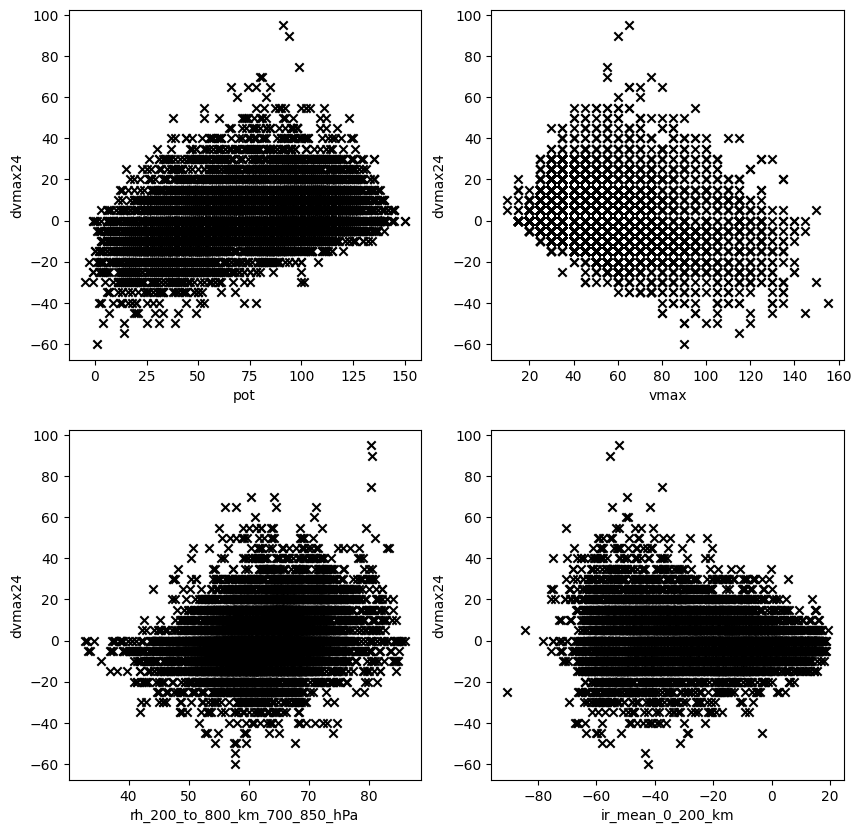

In [13]:
single_diag_vars = ["pot",                             # Potential intensification
                    "vmax",                            # Intensity at observation time
                    "rh_200_to_800_km_700_850_hPa",    # Relative humidity
                    "ir_mean_0_200_km"]                # Mean infrared brightness temperature

plot_single_var(single_diag_vars)

From the plot above, we can see some trends between the diagnostic variables and future 24-hour intensity change. For example, when the potential intensification at the observation time is higher, the future 24-hour intensity change tends to be higher. Physically, this relationship makes sense. Potential intensification is simply an indication of how much stronger the tropical cyclone *can* intensify, based on the thermodynamic conditions around the tropical cyclone. We see a similar pattern in the tropical cyclone intensity at observation time. Tropical cyclones with lower intensities tend to have a higher future 24-hour intensity change.

Looking at the relative humidity (recall: averaged in a 24-hour period between the observation time and forecast time), when the relative humidity is higher, the future 24-hour intensity change is higher. This relationship also makes sense. Higher relative humidity around the tropical cyclone provides a more conducive environment for the sustenance of organized deep convection within the tropical cyclone inner core, which would subsequently sustain the tropical cyclone intensity, if not intensify the tropical cyclone.

However, these relationships are not as strong as one might expect&mdash;there is still a large spread in the diagnostic values. Further, in analyzing the relationship between the mean infrared brightness temperature at observation time and future 24-hour intensity change, the relationship appears almost non-existent. That is, regardless of the value of mean infrared brightness temperature, many of the future 24-hour intensity change values straddle about 0.

The analysis above highlights the fundamental aspect of all natural phenomena, including tropical cyclones&mdash;there is rarely a single factor that influences a phenomenon. Hence, we will do a deeper analysis of the diagnostic variables and their relationships to the future 24-hour intensity change next.

<div class="alert alert-block alert-success">
    <h4>Exercise 1</h4>Use the function above to plot the relationship between other diagnostic variables and intensity change. How does any observed trend explain the physical relationship between the diagnostic variable and intensity change? For example, would you expect to see more more tropical cyclones undergoing rapid intensification over higher sea surface temperatures or lower sea surface temperatures?
</div>

### Analysis of the Relationship Between Two Diagnostic Variables and Intensity Change
As we have seen above, the relationship between a single diagnostic variable and future 24-hour intensity change is not as clear, since multiple factors influence tropical cyclone intensity change. In this section, we will analyze the relationship between two diagnostic variables and future 24-hour intensity change. To make interpretation more intuitive, we will separate the variable values into five distinct intensity change group and plot a two-dimensional histogram from each group. These groups are:
- Rapidly Weakening: future 24-hour intensity change of -30 knots or stronger (more negative)
- Slowly Weakening: future 24-hour intensity change between -30 and -10 knots
- Neutral: future 24-hour intensity change including and between -10 and 10 knots
- Slowly Intensifying: future 24-hour intensity change between 10 and 30 knots
- Rapidly Intensifying: future 24-hour intensity change of 30 knots or stronger (more positive)

Note that the number of samples in each of these groups will differ. So, to better highlight the differences between the groups, we will plot a two-dimensional histogram normalized by the maximum count in each group. Let's define a function to make this plot.

In [14]:
def plot_dual_vars(vars_list):
    """
    Plot the relationship between two diagnostic variables and
    future 24-hour intensity change
    
    Parameters
    ----------
    vars_list : list
        List of a combination of two diagnostic variables
    """
    
    # Specify the future 24-hour intensity change group thresholds
    # Recall that the resolution of the tropical cyclone intensity is
    # 5 knots. We will set these thresholds accordingly so that we can
    # use only one constant condition below.
    dvmax24_groups = [[-150, -30], [-30, -11], [-11, 10], [11, 29], [29, 150]]
    
    # Specify future 24-hour intensity change group names
    dvmax24_groupnames = ["Rapidly Weakening", "Slowly Weakening", "Neutral",
                          "Slowly Intensifying", "Rapidly Intensifying"]
    
    # Let's first retrieve the number of two-diagnostic-variable
    # combinations to specify the number of rows in our figure
    nrows = len(vars_list)
    
    # Keep the number of columns constant, one for each future 24-hour
    # intensity change group
    ncols = 5
    
    # Using number of columns and rows, set figure size
    fig_width = ncols * 5
    fig_height = nrows * 5
    
    # Set figure size
    fig = plt.figure(figsize=[fig_width, fig_height])
    
    # List supplementary information variables to avoid
    non_diag_vars = ["datetime_str", "season", "atcfid", "fcst_time_str"]
    
    # Retrieve future 24-hour intensity change variable from our data frame
    dvmax24 = np.array(df["dvmax24"])
    
    # Loop through each two-diagnostic-variable combination
    for vars_idx, varnames in enumerate(vars_list):
        
        # Retrieve the name of the first variable
        varname1 = varnames[0]
        
        # Retrieve the name of the second variable
        varname2 = varnames[1]
        
        # If either of the variables is in the list of supplementary information variables,
        # print out message to select a different variable
        if (varname1 in non_diag_vars):
            
            print(f"{varname1} is not a valid diagnostic variable. Please select a different variable.")
        
        elif (varname2 in non_diag_vars):
            
            print(f"{varname2} is not a valid diagnostic variable. Please select a different variable.")
        
        # If variable is a diagnostic variable
        else:
            
            # Retrieve the first diagnostic variable from our data frame
            var1 = np.array(df[varname1])
            
            # Retrieve the second diagnostic variable from our data frame
            var2 = np.array(df[varname2])
            
            # Find index of the variables that do not have fill values
            valid_idx = np.where((var1 != _FillValue) & (var2 != _FillValue))
            
            # Retrieve the diagnostic and intensity change variables without fill values
            valid_var1 = var1[valid_idx]
            valid_var2 = var2[valid_idx]
            valid_dvmax24 = dvmax24[valid_idx]
            
            # Specify the bins for the two-dimensional histogram, with each
            # variable having 10 bins
            var1_bins = np.linspace(np.min(valid_var1), np.max(valid_var1), 10)
            var2_bins = np.linspace(np.min(valid_var2), np.max(valid_var2), 10)
            
            # Loop through each future 24-hour intensity change group
            for dvmax_idx, dvmax_group in enumerate(dvmax24_groups):
                
                # Find index of the future 24-hour intensity change variable that match
                # the thresholds we set above
                dvmax_group_idx = np.where((dvmax_group[0] < valid_dvmax24) &
                                           (valid_dvmax24 <= dvmax_group[1]))
                
                # Retrieve the variable values that match the group threshold
                dvmax_group_var1 = valid_var1[dvmax_group_idx]
                dvmax_group_var2 = valid_var2[dvmax_group_idx]
                
                # Generate a histogram using the parameters we've defined above
                # and the two diagnostic variables
                H, xedges, yedges = np.histogram2d(dvmax_group_var1, dvmax_group_var2,
                                                   bins=(var1_bins, var2_bins))
                
                # Transpose and normalize the histogram by the maximum count for plotting
                norm_H = H.T / np.max(H)
                
                # Obtain the number of samples in each intensity change group
                n_samples = len(dvmax_group_idx[0])
                
                # Here's a little accounting to make sure we plot each subplot
                # in the correct position
                if vars_idx == 0:
                    
                    subfig_num = dvmax_idx + 1
                    
                else:
                    
                    subfig_num = 5 * vars_idx + dvmax_idx + 1
                
                # Initialize subplot
                plt.subplot(nrows, ncols, subfig_num)
                
                # Plot normalized histogram
                im = plt.pcolormesh(xedges, yedges, norm_H, cmap="YlOrRd")
                
                # Plot labels for axes
                plt.xlabel(varname1, fontsize=14)
                plt.ylabel(varname2, fontsize=14)
                
                # Let's put a text with the number of samples in each group
                # Specify the x and y location of the text using the bin edges
                text_x = xedges[-3]
                text_y = yedges[-2]
                
                # Plot the number of samples in each group
                plt.text(text_x, text_y, "N = " + str(n_samples), ha="center", va="center", fontsize=14)
                
                # Label the different groups at the top of the figure
                # by calling the group names only if we're plotting the first
                # set of two-diagnostic-variables combination
                if vars_idx == 0:
                    
                    plt.title(dvmax24_groupnames[dvmax_idx], fontsize=16)
    
    # Adjust the spacing between the subplots
    plt.subplots_adjust(hspace=0.27, wspace=0.27)
    
    # Add a single colorbar to the set of subplots
    # Add axis to figure
    cb_ax = fig.add_axes([0.93, 0.12, 0.02, 0.76])
    
    # Specify colorbar
    cbar = fig.colorbar(im, cax=cb_ax, orientation="vertical")
    
    # Set colorbar label parameters
    cbar.set_label("Normalized Count", size=16)
    cbar.ax.tick_params(labelsize=16)

Now that we have defined the function to investigate the relationship between two diagnostic variables and intensity change, let's select a few combinations of two diagnostic variables to investigate.

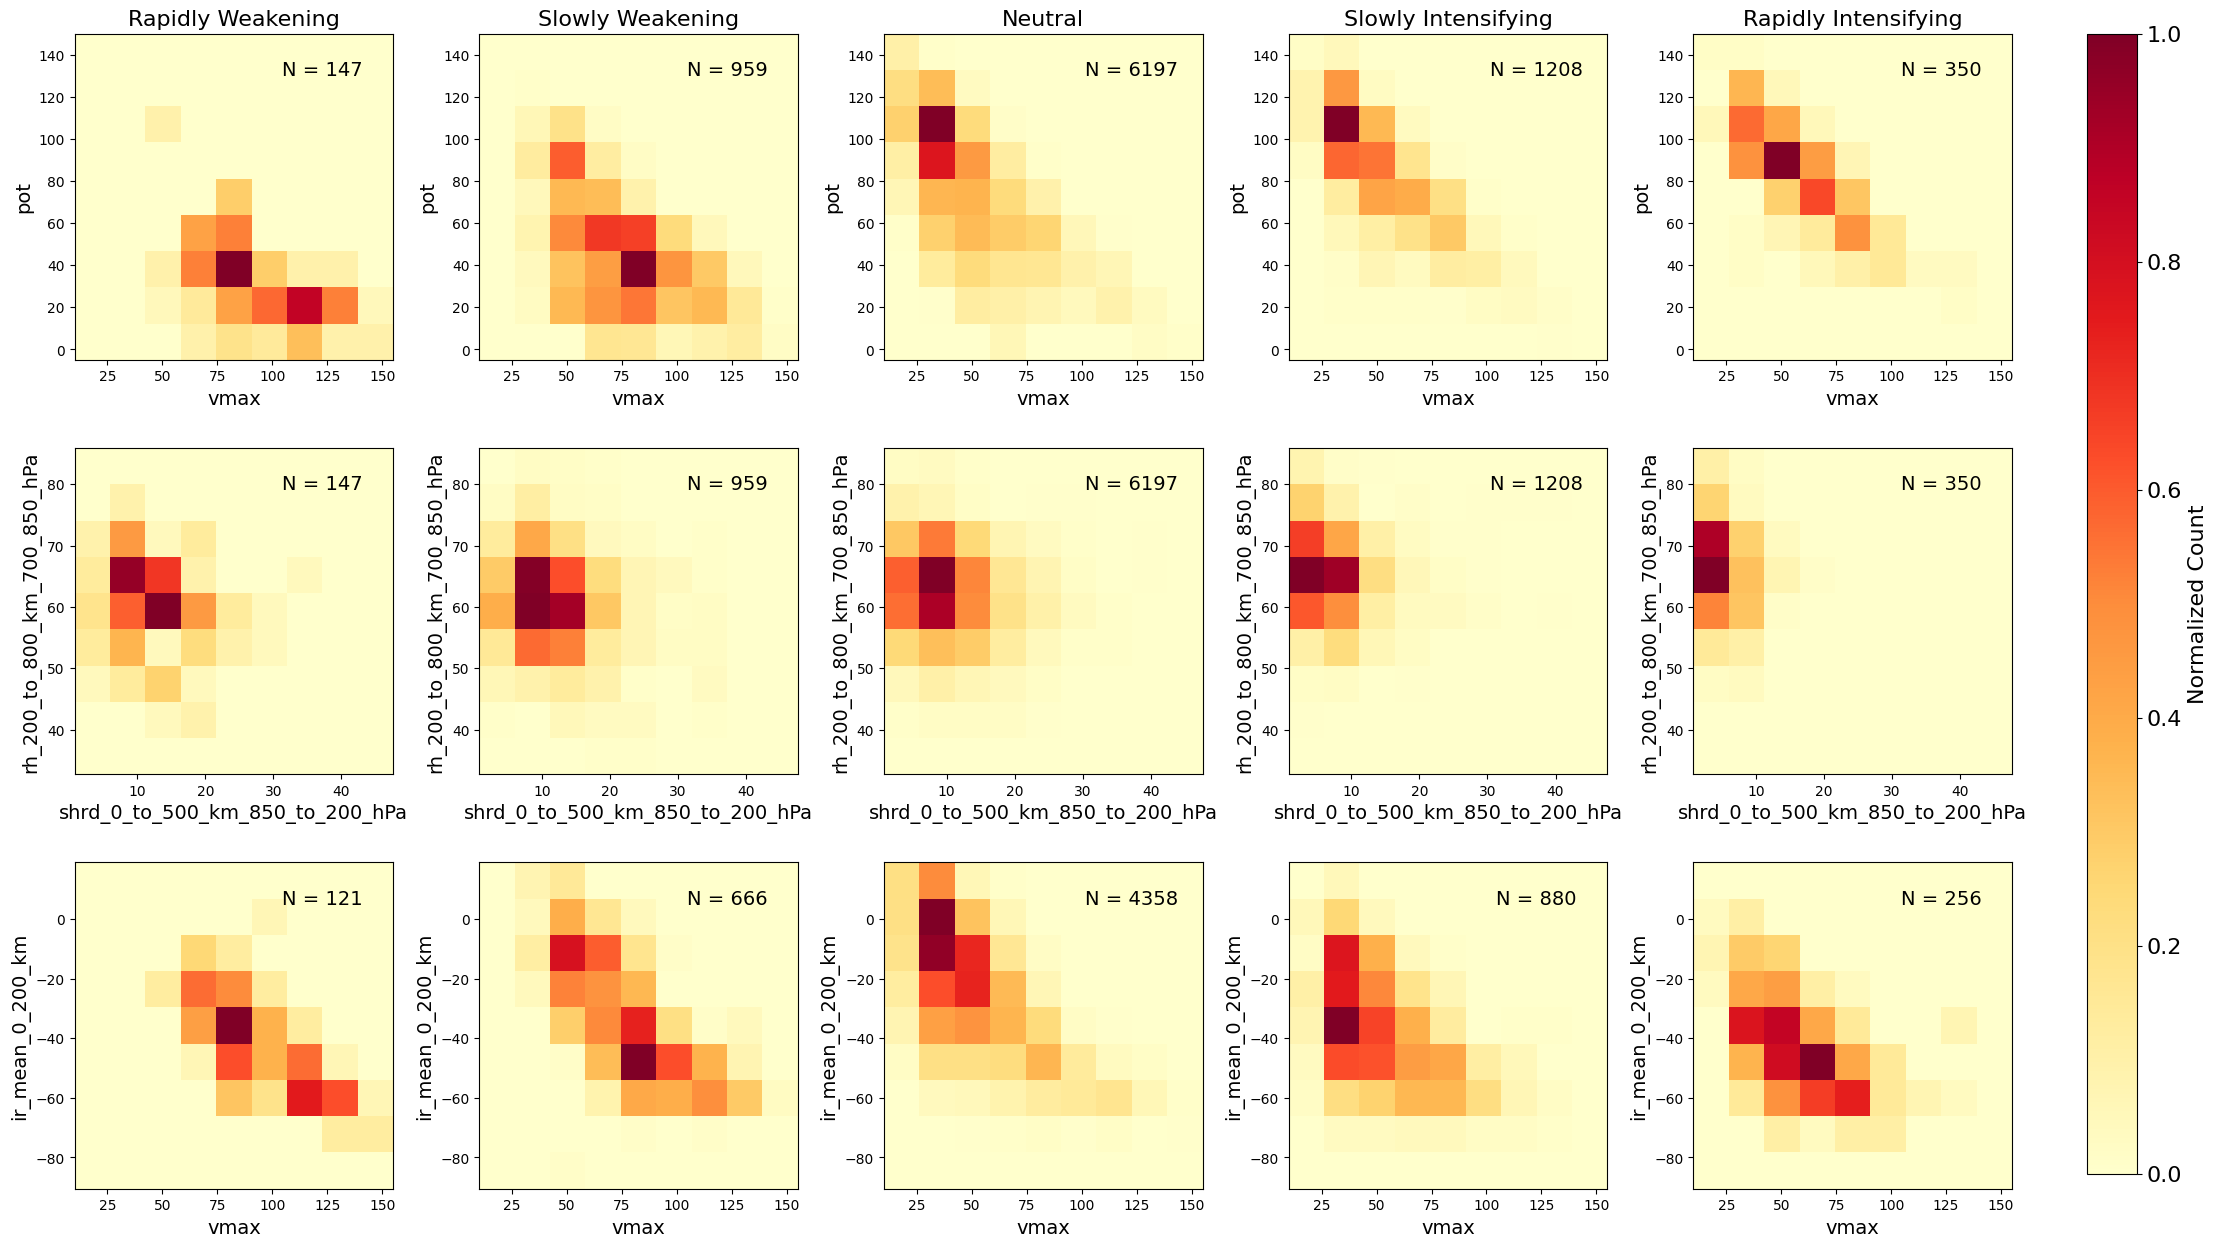

In [15]:
dual_vars = [# Intensity and potential intensification
             ["vmax", "pot"],
             # Shear magnitude and relative humidity
             ["shrd_0_to_500_km_850_to_200_hPa", "rh_200_to_800_km_700_850_hPa"],
             # Intensity and mean infrared brightness temperature
             ["vmax", "ir_mean_0_200_km"]]

plot_dual_vars(dual_vars)

From the plot above, notice:
- the number of tropical cyclones in our sample that underwent extreme intensity changes (i.e., rapid weakening and rapid intensification) is much smaller than in the other groups. This disparity in the sample size highlights why extreme intensity changes are more difficult to predict.
- the number of samples in the plots with infrared-based diagnostics is lower. Recall that, in TC PRIMED, not all "observation" times from the environmental file have a coincident infrared observation. Therefore, when matching infrared and environmental diagnostics, the number of samples is lower.

Analyzing the relationship between future 24-hour intensity change, intensity at observation time, and potential intensification, we see:
- a large number of tropical cyclones that underwent rapid weakening have moderate-to-high intensity and lower potential intensification.
- a large number of tropical cyclones that underwent slow intensification have low intensity and high potential intensification.
- a large number of tropical cyclones that underwent rapid intensification have low-to-moderate intensity and moderate-to-high potential intensification

These results show that intensifying tropical cyclones tend to be weaker, where they have a bigger potential to intensify. Recall, however, that we calculated potential intensification using the empirical maximum potential intensity. The empirical maximum potential intensity is primarily a function of the sea surface temperature and the temperature of the tropopause&mdash;it does not include other factors like environmental humidity and vertical shear.

Analyzing the relationship between future 24-hour intensity change, vertical shear magnitude, and relative humidity, we see that going from rapidly weakening storms to rapidly intensifying storms, the distribution of vertical shear magnitude and environmental humidity experienced by the storms in each group becomes more concentrated towards low vertical shear magnitude and high environmental humidity. In other words, the chances of a tropical cyclone undergoing slow or rapid intensification increases when the vertical shear magnitude is low and environmental humidity is high. As we have discussed in our introduction above, high environmental humidity and low vertical shear magnitude helps sustain convection in the tropical cyclone, leading to a higher likelihood of intensification.

Finally, analyzing the relationship between future 24-hour intensity change, intensity at observation time, and mean infrared brightness temperature at observation time, we see a clearer signal compared to when we analyzed the relationship between the mean infrared brightness temperature and future 24-hour intensity change alone. Tropical cyclones with low mean infrared brightness temperature and high intensity are more likely to weaken. In this scenario, the low mean brightness temperature is a symptom of the strong tropical cyclone intensity, and not a precursor for rapid intensification, since strong tropical cyclones tend to have persistent deep convection. Whereas intensifying tropical cyclones have low mean infrared brightness temperature and low-to-moderate intensity, and the presence of deep convection helps intensify the tropical cyclone.

<div class="alert alert-block alert-success">
    <h4>Exercise 2</h4>Similar to Exercise 1, use the function above to plot the relationship between other two-diagnostic-variable combinations and intensity change. How does any observed distribution explain the physical relationship between the diagnostic variables and intensity change?
</div>

## Final Thoughts
In this notebook, you learned how to extract environmental and satellite infrared-based diagnostics of tropical cyclones, and future 24-hour intensity change variable from TC PRIMED. Then, you explored the different diagnostic variables and how they relate to tropical cyclone future intensity change. Understanding the relationship between these variables and intensity change will help in understanding the physics behind tropical cyclone intensity change and guide you in developing a successful machine-learning-based tropical cyclone rapid intensification statistical model, which we will cover in the next notebook.

## Data Statement
The data used in the notebook is publicly available from the following resources:

- Razin, Muhammad Naufal; Slocum, Christopher J.; Knaff, John A.; Brown, Paula J. 2023a. Tropical Cyclone PRecipitation, Infrared, Microwave, and Environmental Dataset (TC PRIMED). v01r01. NOAA National Centers for Environmental Information. https://doi.org/10.25921/dmy1-0595.
- Razin, Muhammad Naufal and M. McGraw, 2025: Dataset for Tropical Cyclone Rapid Intensification Learning Journey. Zenodo. [https://doi.org/10.5281/zenodo.16583938](https://doi.org/10.5281/zenodo.16583938).

## References
1. DeMaria, M., J.L. Franklin, M.J. Onderlinde, and J. Kaplan, 2021: Operational forecasting of tropical cyclone rapid intensification at the National Hurricane Center. *Atmosphere*, **12**, 683. https://doi.org/10.3390/atmos12060683.

2. Griffin, S., A. Wimmers, and C. Velden, 2022: Predicting rapid intensification in North Atlantic and eastern North Pacific tropical cyclones using a convolutional neural network. *Wea. Forecasting*, **37**, 1333-1355. https://doi.org/10.1175/WAF-D-21-0194.1.

3. Kaplan, J., and M. DeMaria, 2003: Large-scale characteristics of rapidly intensifying tropical cyclones in the North Atlantic basin. *Wea. Forecasting*, **18**, 1093–1108, https://doi.org/10.1175/1520-0434(2003)018,1093:LCORIT.2.0.CO;2.

4. Kaplan, J., C.M. Rozoff, M. DeMaria, C.R. Sampson, J.P. Kossin, C.S. Velden, J.J. Cione, J.P. Dunion, J.A. Knaff, J.A. Zhang, et al., 2015: Evaluating environmental impacts on tropical cyclone rapid intensification predictability utilizing statistical models. *Wea. Forecasting*, **30**, 1374-1396. https://doi.org/10.1175/WAF-D-15-0032.1.

5. Knaff, J.A., C.R. Sampson, and K.D. Musgrave, 2018: An operational rapid intensification prediction aid for the Western North Pacific. *Wea. Forecasting*, **33**, 799-811. https://doi.org/10.1175/WAF-D-18-0012.1.

6. Razin, M.N., C.J. Slocum, J.A. Knaff, and P.J. Brown, 2023a: Tropical Cyclone Precipitation, Infrared, Microwave, and Environmental Dataset (TC PRIMED), v01r01, NOAA National Centers for Environmental Information. https://doi.org/10.25921/dmy1-0595.

7. Razin, M. N., C. J. Slocum, J. A. Knaff, P. J. Brown, and M. M. Bell, 2023b: Tropical Cyclone Precipitation, Infrared, Microwave, and Environmental Dataset (TC PRIMED). *Bull. Amer. Meteor. Soc.*, **104**, E1980–E1998, https://doi.org/10.1175/BAMS-D-21-0052.1.

8. Sampson, C., J. Knaff, C. Slocum, M. Onderlinde, A. Brammer, M. Frost, and B. Strahl (2023): Deterministic rapid intensity forecast guidance for the Joint Typhoon Warning Center's Area of Responsibility. *Wea. Forecasting*, **38**, 2631-2640. https://doi.org/10.1175/WAF-D-23-0084.1.

9. Slocum, C. J., M. N. Razin, J. A. Knaff, and S. P. Stow, 2022: Does ERA5 mark a new era for resolving the tropical cyclone environment? *J. Climate*, **35**, 3547–3564, https://doi.org/10.1175/JCLI-D-22-0127.1.

## Metadata
Language / package(s)
* Python
* tcprimedapi
* netCDF4
* numpy
* pandas
* matplotlib

Domain
* NOAA
* NHC
* CPHC
* JTWC
* ECMWF

Application keywords
* Forecasting
  
Geophysical keywords
* Tropical cyclones
* Satellite data
* Environmental data
* Rapid intensification

AI keywords
* Data pre-processing

## Disclaimer
This Jupyter notebook is a scientific product and is not official communication of the National Oceanic and Atmospheric Administration, or the United States Department of Commerce. All NOAA Jupyter notebooks are provided on an 'as is' basis and the user assumes responsibility for its use. Any claims against the Department of Commerce or Department of Commerce bureaus stemming from the use of this Jupyter notebook will be governed by all applicable Federal law. Any reference to specific commercial products, processes, or services by service mark, trademark, manufacturer, or otherwise does not constitute or imply their endorsement, recommendation or favoring by the Department of Commerce. The Department of Commerce seal and logo, or the seal and logo of a DOC bureau, shall not be used in any manner to imply endorsement of any commercial product or activity by DOC or the United States Government.